In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [19]:
df = pd.read_csv('smoke_shops_census_updated_final.csv')
df

,GEOID,NAME,B01002_001_estimate,population_estimate,total_race_estimate,white_estimate,med_inc_estimate,owners_estimate,renters_estimate,perc_poverty_estimate,B01002_001_moe,population_moe,total_race_moe,white_moe,med_inc_moe,owners_moe,renters_moe,perc_poverty_moe,LOCAL.HEALTH.UNIT,OPERATION.NAME,CITY,STATE,ZIP,MUNICIPALITY,COUNTY,VENDOR.TYPE,CREATION.DATE,LOCATION,LAT,LONG,ADDRESS,census_code,census_tract
0,36005000200,Census Tract 2; Bronx County; New York,40.7,4870,4870,1473,115064,858,567,14.1,4.5,621,621,450,51789,141,261,6.9,NYC,TAYLOR SUPERETTE CORP,BRONX,NY,10473,BRONX,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"459 TAYLOR AVENUE BRONX, NY 10473 (40.81483320...",40.814833,-73.861562,"459 TAYLOR AVENUE BRONX, NY 10473",360050002001002,36005000200
1,36005000200,Census Tract 2; Bronx County; New York,40.7,4870,4870,1473,115064,858,567,14.1,4.5,621,621,450,51789,141,261,6.9,NYC,2020 KARIM MARKET CORP,BRONX,NY,10473,BRONX,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"333 SOUNDVIEW AVENUE BRONX, NY 10473 (40.81225...",40.812257,-73.856871,"333 SOUNDVIEW AVENUE BRONX, NY 10473",360050002002008,36005000200
2,36005000400,Census Tract 4; Bronx County; New York,36.3,6257,6257,1897,100553,1409,900,6.0,5.7,982,982,672,31493,268,375,3.2,NYC,RASHAD L. MOHAMMED,BRONX,NY,10026,BRONX,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"268 WHITE PLAINS ROAD BRONX, NY 10026 (40.8113...",40.811336,-73.855572,"268 WHITE PLAINS ROAD BRONX, NY 10026",360050004002006,36005000400
3,36005000400,Census Tract 4; Bronx County; New York,36.3,6257,6257,1897,100553,1409,900,6.0,5.7,982,982,672,31493,268,375,3.2,NYC,EXPRESS FOOD AND GROCERY INC.,BRONX,NY,10473,BRONX,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"444 SOUNDVIEW AVENUE BRONX, NY 10473 (40.81481...",40.814812,-73.858863,"444 SOUNDVIEW AVENUE BRONX, NY 10473",360050004001002,36005000400
4,36005000400,Census Tract 4; Bronx County; New York,36.3,6257,6257,1897,100553,1409,900,6.0,5.7,982,982,672,31493,268,375,3.2,NYC,RIVERA DELI CORP,BRONX,NY,10473,BRONX,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"400 SOUNDVIEW AVENUE BRONX, NY 10473 (40.8135...",40.813523,-73.857651,"400 SOUNDVIEW AVENUE BRONX, NY 10473",360050004001001,36005000400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5335,36085030302,Census Tract 303.02; Richmond County; New York,37.9,6374,6374,1619,98535,1662,413,14.1,2.7,638,638,552,11391,239,155,7.7,NYC,MONSEY PLACE DELI & GROCERY INC,STATEN ISLAND,NY,10314,STATEN ISLAND,NEW YORK CITY,CONVENIENCE STORE,07/10/2023,"950 RICHMOND AVENUE STATEN ISLAND, NY 10314 (4...",40.623954,-74.149118,"950 RICHMOND AVENUE STATEN ISLAND, NY 10314",360850303023015,36085030302
5336,36085030302,Census Tract 303.02; Richmond County; New York,37.9,6374,6374,1619,98535,1662,413,14.1,2.7,638,638,552,11391,239,155,7.7,NYC,JAY BRAHMANI LLC,STATEN ISLAND,NY,10303,STATEN ISLAND,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"2040 FOREST AVENUE STATEN ISLAND, NY 10303 (40...",40.625770,-74.155896,"2040 FOREST AVENUE STATEN ISLAND, NY 10303",360850303023003,36085030302
5337,36085031902,Census Tract 319.02; Richmond County; New York,35.1,5053,5053,2592,75057,879,706,22.8,3.6,642,642,725,35652,153,137,8.7,NYC,QS CONVENIENCE CORP,STATEN ISLAND,NY,10303,STATEN ISLAND,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"3016 RICHMOND TERRACE STATEN ISLAND, NY 10303 ...",40.637178,-74.160389,"3016 RICHMOND TERRACE STATEN ISLAND, NY 10303",360850319023007,36085031902
5338,36085032300,Census Tract 323; Richmond County; New York,42.8,1133,1133,430,88558,310,115,4.9,2.1,304,304,177,23137,102,54,3.7,NYC,"YOUR TASTE DELI, INC.",STATEN ISLAND,NY,10303,STATEN ISLAND,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"2524 FOREST AVENUE STATEN ISLAND, NY 10303 (40...",40.626328,-74.174343,"2524 FOREST AVENUE STATEN ISLAND, NY 10303",360850323001021,36085032300


In [20]:
df.columns

Index(['GEOID', 'NAME', 'B01002_001_estimate', 'population_estimate',
       'total_race_estimate', 'white_estimate', 'med_inc_estimate',
       'owners_estimate', 'renters_estimate', 'perc_poverty_estimate',
       'B01002_001_moe', 'population_moe', 'total_race_moe', 'white_moe',
       'med_inc_moe', 'owners_moe', 'renters_moe', 'perc_poverty_moe',
       'LOCAL.HEALTH.UNIT', 'OPERATION.NAME', 'CITY', 'STATE', 'ZIP',
       'MUNICIPALITY', 'COUNTY', 'VENDOR.TYPE', 'CREATION.DATE', 'LOCATION',
       'LAT', 'LONG', 'ADDRESS', 'census_code', 'census_tract'],
      dtype='object')

In [13]:
# show all columns in the dataframe

pd.set_option('display.max_columns', None)

In [21]:
df

,GEOID,NAME,B01002_001_estimate,population_estimate,total_race_estimate,white_estimate,med_inc_estimate,owners_estimate,renters_estimate,perc_poverty_estimate,B01002_001_moe,population_moe,total_race_moe,white_moe,med_inc_moe,owners_moe,renters_moe,perc_poverty_moe,LOCAL.HEALTH.UNIT,OPERATION.NAME,CITY,STATE,ZIP,MUNICIPALITY,COUNTY,VENDOR.TYPE,CREATION.DATE,LOCATION,LAT,LONG,ADDRESS,census_code,census_tract
0,36005000200,Census Tract 2; Bronx County; New York,40.7,4870,4870,1473,115064,858,567,14.1,4.5,621,621,450,51789,141,261,6.9,NYC,TAYLOR SUPERETTE CORP,BRONX,NY,10473,BRONX,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"459 TAYLOR AVENUE BRONX, NY 10473 (40.81483320...",40.814833,-73.861562,"459 TAYLOR AVENUE BRONX, NY 10473",360050002001002,36005000200
1,36005000200,Census Tract 2; Bronx County; New York,40.7,4870,4870,1473,115064,858,567,14.1,4.5,621,621,450,51789,141,261,6.9,NYC,2020 KARIM MARKET CORP,BRONX,NY,10473,BRONX,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"333 SOUNDVIEW AVENUE BRONX, NY 10473 (40.81225...",40.812257,-73.856871,"333 SOUNDVIEW AVENUE BRONX, NY 10473",360050002002008,36005000200
2,36005000400,Census Tract 4; Bronx County; New York,36.3,6257,6257,1897,100553,1409,900,6.0,5.7,982,982,672,31493,268,375,3.2,NYC,RASHAD L. MOHAMMED,BRONX,NY,10026,BRONX,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"268 WHITE PLAINS ROAD BRONX, NY 10026 (40.8113...",40.811336,-73.855572,"268 WHITE PLAINS ROAD BRONX, NY 10026",360050004002006,36005000400
3,36005000400,Census Tract 4; Bronx County; New York,36.3,6257,6257,1897,100553,1409,900,6.0,5.7,982,982,672,31493,268,375,3.2,NYC,EXPRESS FOOD AND GROCERY INC.,BRONX,NY,10473,BRONX,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"444 SOUNDVIEW AVENUE BRONX, NY 10473 (40.81481...",40.814812,-73.858863,"444 SOUNDVIEW AVENUE BRONX, NY 10473",360050004001002,36005000400
4,36005000400,Census Tract 4; Bronx County; New York,36.3,6257,6257,1897,100553,1409,900,6.0,5.7,982,982,672,31493,268,375,3.2,NYC,RIVERA DELI CORP,BRONX,NY,10473,BRONX,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"400 SOUNDVIEW AVENUE BRONX, NY 10473 (40.8135...",40.813523,-73.857651,"400 SOUNDVIEW AVENUE BRONX, NY 10473",360050004001001,36005000400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5335,36085030302,Census Tract 303.02; Richmond County; New York,37.9,6374,6374,1619,98535,1662,413,14.1,2.7,638,638,552,11391,239,155,7.7,NYC,MONSEY PLACE DELI & GROCERY INC,STATEN ISLAND,NY,10314,STATEN ISLAND,NEW YORK CITY,CONVENIENCE STORE,07/10/2023,"950 RICHMOND AVENUE STATEN ISLAND, NY 10314 (4...",40.623954,-74.149118,"950 RICHMOND AVENUE STATEN ISLAND, NY 10314",360850303023015,36085030302
5336,36085030302,Census Tract 303.02; Richmond County; New York,37.9,6374,6374,1619,98535,1662,413,14.1,2.7,638,638,552,11391,239,155,7.7,NYC,JAY BRAHMANI LLC,STATEN ISLAND,NY,10303,STATEN ISLAND,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"2040 FOREST AVENUE STATEN ISLAND, NY 10303 (40...",40.625770,-74.155896,"2040 FOREST AVENUE STATEN ISLAND, NY 10303",360850303023003,36085030302
5337,36085031902,Census Tract 319.02; Richmond County; New York,35.1,5053,5053,2592,75057,879,706,22.8,3.6,642,642,725,35652,153,137,8.7,NYC,QS CONVENIENCE CORP,STATEN ISLAND,NY,10303,STATEN ISLAND,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"3016 RICHMOND TERRACE STATEN ISLAND, NY 10303 ...",40.637178,-74.160389,"3016 RICHMOND TERRACE STATEN ISLAND, NY 10303",360850319023007,36085031902
5338,36085032300,Census Tract 323; Richmond County; New York,42.8,1133,1133,430,88558,310,115,4.9,2.1,304,304,177,23137,102,54,3.7,NYC,"YOUR TASTE DELI, INC.",STATEN ISLAND,NY,10303,STATEN ISLAND,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"2524 FOREST AVENUE STATEN ISLAND, NY 10303 (40...",40.626328,-74.174343,"2524 FOREST AVENUE STATEN ISLAND, NY 10303",360850323001021,36085032300


In [22]:
# create a new column that by dividing renters by owners
df['renters_to_owners'] = df['renters_estimate'] / df['owners_estimate']
df

,GEOID,NAME,B01002_001_estimate,population_estimate,total_race_estimate,white_estimate,med_inc_estimate,owners_estimate,renters_estimate,perc_poverty_estimate,B01002_001_moe,population_moe,total_race_moe,white_moe,med_inc_moe,owners_moe,renters_moe,perc_poverty_moe,LOCAL.HEALTH.UNIT,OPERATION.NAME,CITY,STATE,ZIP,MUNICIPALITY,COUNTY,VENDOR.TYPE,CREATION.DATE,LOCATION,LAT,LONG,ADDRESS,census_code,census_tract,renters_to_owners
0,36005000200,Census Tract 2; Bronx County; New York,40.7,4870,4870,1473,115064,858,567,14.1,4.5,621,621,450,51789,141,261,6.9,NYC,TAYLOR SUPERETTE CORP,BRONX,NY,10473,BRONX,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"459 TAYLOR AVENUE BRONX, NY 10473 (40.81483320...",40.814833,-73.861562,"459 TAYLOR AVENUE BRONX, NY 10473",360050002001002,36005000200,0.660839
1,36005000200,Census Tract 2; Bronx County; New York,40.7,4870,4870,1473,115064,858,567,14.1,4.5,621,621,450,51789,141,261,6.9,NYC,2020 KARIM MARKET CORP,BRONX,NY,10473,BRONX,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"333 SOUNDVIEW AVENUE BRONX, NY 10473 (40.81225...",40.812257,-73.856871,"333 SOUNDVIEW AVENUE BRONX, NY 10473",360050002002008,36005000200,0.660839
2,36005000400,Census Tract 4; Bronx County; New York,36.3,6257,6257,1897,100553,1409,900,6.0,5.7,982,982,672,31493,268,375,3.2,NYC,RASHAD L. MOHAMMED,BRONX,NY,10026,BRONX,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"268 WHITE PLAINS ROAD BRONX, NY 10026 (40.8113...",40.811336,-73.855572,"268 WHITE PLAINS ROAD BRONX, NY 10026",360050004002006,36005000400,0.638751
3,36005000400,Census Tract 4; Bronx County; New York,36.3,6257,6257,1897,100553,1409,900,6.0,5.7,982,982,672,31493,268,375,3.2,NYC,EXPRESS FOOD AND GROCERY INC.,BRONX,NY,10473,BRONX,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"444 SOUNDVIEW AVENUE BRONX, NY 10473 (40.81481...",40.814812,-73.858863,"444 SOUNDVIEW AVENUE BRONX, NY 10473",360050004001002,36005000400,0.638751
4,36005000400,Census Tract 4; Bronx County; New York,36.3,6257,6257,1897,100553,1409,900,6.0,5.7,982,982,672,31493,268,375,3.2,NYC,RIVERA DELI CORP,BRONX,NY,10473,BRONX,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"400 SOUNDVIEW AVENUE BRONX, NY 10473 (40.8135...",40.813523,-73.857651,"400 SOUNDVIEW AVENUE BRONX, NY 10473",360050004001001,36005000400,0.638751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5335,36085030302,Census Tract 303.02; Richmond County; New York,37.9,6374,6374,1619,98535,1662,413,14.1,2.7,638,638,552,11391,239,155,7.7,NYC,MONSEY PLACE DELI & GROCERY INC,STATEN ISLAND,NY,10314,STATEN ISLAND,NEW YORK CITY,CONVENIENCE STORE,07/10/2023,"950 RICHMOND AVENUE STATEN ISLAND, NY 10314 (4...",40.623954,-74.149118,"950 RICHMOND AVENUE STATEN ISLAND, NY 10314",360850303023015,36085030302,0.248496
5336,36085030302,Census Tract 303.02; Richmond County; New York,37.9,6374,6374,1619,98535,1662,413,14.1,2.7,638,638,552,11391,239,155,7.7,NYC,JAY BRAHMANI LLC,STATEN ISLAND,NY,10303,STATEN ISLAND,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"2040 FOREST AVENUE STATEN ISLAND, NY 10303 (40...",40.625770,-74.155896,"2040 FOREST AVENUE STATEN ISLAND, NY 10303",360850303023003,36085030302,0.248496
5337,36085031902,Census Tract 319.02; Richmond County; New York,35.1,5053,5053,2592,75057,879,706,22.8,3.6,642,642,725,35652,153,137,8.7,NYC,QS CONVENIENCE CORP,STATEN ISLAND,NY,10303,STATEN ISLAND,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"3016 RICHMOND TERRACE STATEN ISLAND, NY 10303 ...",40.637178,-74.160389,"3016 RICHMOND TERRACE STATEN ISLAND, NY 10303",360850319023007,36085031902,0.803185
5338,36085032300,Census Tract 323; Richmond County; New York,42.8,1133,1133,430,88558,310,115,4.9,2.1,304,304,177,23137,102,54,3.7,NYC,"YOUR TASTE DELI, INC.",STATEN ISLAND,NY,10303,STATEN ISLAND,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"2524 FOREST AVENUE STATEN ISLAND, NY 10303 (40...",40.626328,-74.174343,"2524 FOREST AVENUE STATEN ISLAND, NY 10303",360850323001021,36085032300

In [23]:
df.columns = df.columns.str.replace('B01002_001', 'med_age')
df

,GEOID,NAME,med_age_estimate,population_estimate,total_race_estimate,white_estimate,med_inc_estimate,owners_estimate,renters_estimate,perc_poverty_estimate,med_age_moe,population_moe,total_race_moe,white_moe,med_inc_moe,owners_moe,renters_moe,perc_poverty_moe,LOCAL.HEALTH.UNIT,OPERATION.NAME,CITY,STATE,ZIP,MUNICIPALITY,COUNTY,VENDOR.TYPE,CREATION.DATE,LOCATION,LAT,LONG,ADDRESS,census_code,census_tract,renters_to_owners
0,36005000200,Census Tract 2; Bronx County; New York,40.7,4870,4870,1473,115064,858,567,14.1,4.5,621,621,450,51789,141,261,6.9,NYC,TAYLOR SUPERETTE CORP,BRONX,NY,10473,BRONX,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"459 TAYLOR AVENUE BRONX, NY 10473 (40.81483320...",40.814833,-73.861562,"459 TAYLOR AVENUE BRONX, NY 10473",360050002001002,36005000200,0.660839
1,36005000200,Census Tract 2; Bronx County; New York,40.7,4870,4870,1473,115064,858,567,14.1,4.5,621,621,450,51789,141,261,6.9,NYC,2020 KARIM MARKET CORP,BRONX,NY,10473,BRONX,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"333 SOUNDVIEW AVENUE BRONX, NY 10473 (40.81225...",40.812257,-73.856871,"333 SOUNDVIEW AVENUE BRONX, NY 10473",360050002002008,36005000200,0.660839
2,36005000400,Census Tract 4; Bronx County; New York,36.3,6257,6257,1897,100553,1409,900,6.0,5.7,982,982,672,31493,268,375,3.2,NYC,RASHAD L. MOHAMMED,BRONX,NY,10026,BRONX,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"268 WHITE PLAINS ROAD BRONX, NY 10026 (40.8113...",40.811336,-73.855572,"268 WHITE PLAINS ROAD BRONX, NY 10026",360050004002006,36005000400,0.638751
3,36005000400,Census Tract 4; Bronx County; New York,36.3,6257,6257,1897,100553,1409,900,6.0,5.7,982,982,672,31493,268,375,3.2,NYC,EXPRESS FOOD AND GROCERY INC.,BRONX,NY,10473,BRONX,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"444 SOUNDVIEW AVENUE BRONX, NY 10473 (40.81481...",40.814812,-73.858863,"444 SOUNDVIEW AVENUE BRONX, NY 10473",360050004001002,36005000400,0.638751
4,36005000400,Census Tract 4; Bronx County; New York,36.3,6257,6257,1897,100553,1409,900,6.0,5.7,982,982,672,31493,268,375,3.2,NYC,RIVERA DELI CORP,BRONX,NY,10473,BRONX,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"400 SOUNDVIEW AVENUE BRONX, NY 10473 (40.8135...",40.813523,-73.857651,"400 SOUNDVIEW AVENUE BRONX, NY 10473",360050004001001,36005000400,0.638751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5335,36085030302,Census Tract 303.02; Richmond County; New York,37.9,6374,6374,1619,98535,1662,413,14.1,2.7,638,638,552,11391,239,155,7.7,NYC,MONSEY PLACE DELI & GROCERY INC,STATEN ISLAND,NY,10314,STATEN ISLAND,NEW YORK CITY,CONVENIENCE STORE,07/10/2023,"950 RICHMOND AVENUE STATEN ISLAND, NY 10314 (4...",40.623954,-74.149118,"950 RICHMOND AVENUE STATEN ISLAND, NY 10314",360850303023015,36085030302,0.248496
5336,36085030302,Census Tract 303.02; Richmond County; New York,37.9,6374,6374,1619,98535,1662,413,14.1,2.7,638,638,552,11391,239,155,7.7,NYC,JAY BRAHMANI LLC,STATEN ISLAND,NY,10303,STATEN ISLAND,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"2040 FOREST AVENUE STATEN ISLAND, NY 10303 (40...",40.625770,-74.155896,"2040 FOREST AVENUE STATEN ISLAND, NY 10303",360850303023003,36085030302,0.248496
5337,36085031902,Census Tract 319.02; Richmond County; New York,35.1,5053,5053,2592,75057,879,706,22.8,3.6,642,642,725,35652,153,137,8.7,NYC,QS CONVENIENCE CORP,STATEN ISLAND,NY,10303,STATEN ISLAND,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"3016 RICHMOND TERRACE STATEN ISLAND, NY 10303 ...",40.637178,-74.160389,"3016 RICHMOND TERRACE STATEN ISLAND, NY 10303",360850319023007,36085031902,0.803185
5338,36085032300,Census Tract 323; Richmond County; New York,42.8,1133,1133,430,88558,310,115,4.9,2.1,304,304,177,23137,102,54,3.7,NYC,"YOUR TASTE DELI, INC.",STATEN ISLAND,NY,10303,STATEN ISLAND,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"2524 FOREST AVENUE STATEN ISLAND, NY 10303 (40...",40.626328,-74.174343,"2524 FOREST AVENUE STATEN ISLAND, NY 10303",360850323001021,36085032300,0.370

In [25]:
# create a new column 'perc_ethnic' by dividing white_estimate by total_race_estimate, then subtracting the result from 1
df['perc_ethnic'] = (1 - (df['white_estimate'] / df['total_race_estimate'])) * 100
df

,GEOID,NAME,med_age_estimate,population_estimate,total_race_estimate,white_estimate,med_inc_estimate,owners_estimate,renters_estimate,perc_poverty_estimate,med_age_moe,population_moe,total_race_moe,white_moe,med_inc_moe,owners_moe,renters_moe,perc_poverty_moe,LOCAL.HEALTH.UNIT,OPERATION.NAME,CITY,STATE,ZIP,MUNICIPALITY,COUNTY,VENDOR.TYPE,CREATION.DATE,LOCATION,LAT,LONG,ADDRESS,census_code,census_tract,renters_to_owners,perc_ethnic
0,36005000200,Census Tract 2; Bronx County; New York,40.7,4870,4870,1473,115064,858,567,14.1,4.5,621,621,450,51789,141,261,6.9,NYC,TAYLOR SUPERETTE CORP,BRONX,NY,10473,BRONX,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"459 TAYLOR AVENUE BRONX, NY 10473 (40.81483320...",40.814833,-73.861562,"459 TAYLOR AVENUE BRONX, NY 10473",360050002001002,36005000200,0.660839,69.753593
1,36005000200,Census Tract 2; Bronx County; New York,40.7,4870,4870,1473,115064,858,567,14.1,4.5,621,621,450,51789,141,261,6.9,NYC,2020 KARIM MARKET CORP,BRONX,NY,10473,BRONX,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"333 SOUNDVIEW AVENUE BRONX, NY 10473 (40.81225...",40.812257,-73.856871,"333 SOUNDVIEW AVENUE BRONX, NY 10473",360050002002008,36005000200,0.660839,69.753593
2,36005000400,Census Tract 4; Bronx County; New York,36.3,6257,6257,1897,100553,1409,900,6.0,5.7,982,982,672,31493,268,375,3.2,NYC,RASHAD L. MOHAMMED,BRONX,NY,10026,BRONX,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"268 WHITE PLAINS ROAD BRONX, NY 10026 (40.8113...",40.811336,-73.855572,"268 WHITE PLAINS ROAD BRONX, NY 10026",360050004002006,36005000400,0.638751,69.681956
3,36005000400,Census Tract 4; Bronx County; New York,36.3,6257,6257,1897,100553,1409,900,6.0,5.7,982,982,672,31493,268,375,3.2,NYC,EXPRESS FOOD AND GROCERY INC.,BRONX,NY,10473,BRONX,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"444 SOUNDVIEW AVENUE BRONX, NY 10473 (40.81481...",40.814812,-73.858863,"444 SOUNDVIEW AVENUE BRONX, NY 10473",360050004001002,36005000400,0.638751,69.681956
4,36005000400,Census Tract 4; Bronx County; New York,36.3,6257,6257,1897,100553,1409,900,6.0,5.7,982,982,672,31493,268,375,3.2,NYC,RIVERA DELI CORP,BRONX,NY,10473,BRONX,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"400 SOUNDVIEW AVENUE BRONX, NY 10473 (40.8135...",40.813523,-73.857651,"400 SOUNDVIEW AVENUE BRONX, NY 10473",360050004001001,36005000400,0.638751,69.681956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5335,36085030302,Census Tract 303.02; Richmond County; New York,37.9,6374,6374,1619,98535,1662,413,14.1,2.7,638,638,552,11391,239,155,7.7,NYC,MONSEY PLACE DELI & GROCERY INC,STATEN ISLAND,NY,10314,STATEN ISLAND,NEW YORK CITY,CONVENIENCE STORE,07/10/2023,"950 RICHMOND AVENUE STATEN ISLAND, NY 10314 (4...",40.623954,-74.149118,"950 RICHMOND AVENUE STATEN ISLAND, NY 10314",360850303023015,36085030302,0.248496,74.599937
5336,36085030302,Census Tract 303.02; Richmond County; New York,37.9,6374,6374,1619,98535,1662,413,14.1,2.7,638,638,552,11391,239,155,7.7,NYC,JAY BRAHMANI LLC,STATEN ISLAND,NY,10303,STATEN ISLAND,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"2040 FOREST AVENUE STATEN ISLAND, NY 10303 (40...",40.625770,-74.155896,"2040 FOREST AVENUE STATEN ISLAND, NY 10303",360850303023003,36085030302,0.248496,74.599937
5337,36085031902,Census Tract 319.02; Richmond County; New York,35.1,5053,5053,2592,75057,879,706,22.8,3.6,642,642,725,35652,153,137,8.7,NYC,QS CONVENIENCE CORP,STATEN ISLAND,NY,10303,STATEN ISLAND,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"3016 RICHMOND TERRACE STATEN ISLAND, NY 10303 ...",40.637178,-74.160389,"3016 RICHMOND TERRACE STATEN ISLAND, NY 10303",360850319023007,36085031902,0.803185,48.703740
5338,36085032300,Census Tract 323; Richmond County; New York,42.8,1133,1133,430,88558,310,115,4.9,2.1,304,304,177,23137,102,54,3.7,NYC,"YOUR TASTE DELI, INC.",STATEN ISLAND,NY,10303,STATEN ISLAND,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"2524 FOREST AVENUE STATEN ISLAND, NY 10303 (40...",40.

In [29]:
#unique geoid
df_df['GEOID'].value_counts()

GEOID
36085002100    17
36005006301    14
36005006500    14
36047055300    13
36005038900    13
               ..
36081035100     1
36047068200     1
36081033405     1
36081033403     1
36047041401     1
Name: count, Length: 1660, dtype: int64

In [30]:
df[df['GEOID'] == 36005006301]

,GEOID,NAME,med_age_estimate,population_estimate,total_race_estimate,white_estimate,med_inc_estimate,owners_estimate,renters_estimate,perc_poverty_estimate,med_age_moe,population_moe,total_race_moe,white_moe,med_inc_moe,owners_moe,renters_moe,perc_poverty_moe,LOCAL.HEALTH.UNIT,OPERATION.NAME,CITY,STATE,ZIP,MUNICIPALITY,COUNTY,VENDOR.TYPE,CREATION.DATE,LOCATION,LAT,LONG,ADDRESS,census_code,census_tract,renters_to_owners,perc_ethnic
107,36005006301,Census Tract 63.01; Bronx County; New York,38.4,5845,5845,2288,55396,511,1792,26.9,2.4,1004,1004,668,8429,296,238,8.5,NYC,AMG RETAIL I LLC,BRONX,NY,10451,BRONX,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"99 E 149TH STREET BRONX, NY 10451 (40.8195903...",40.819590,-73.929857,"99 E 149TH STREET BRONX, NY 10451",360050063016016,36005006301,3.506849,60.855432
108,36005006301,Census Tract 63.01; Bronx County; New York,38.4,5845,5845,2288,55396,511,1792,26.9,2.4,1004,1004,668,8429,296,238,8.5,NYC,630 DELI GROCERY CORP.,BRONX,NY,10451,BRONX,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"630 WALTON AVENUE BRONX, NY 10451 (40.82113819...",40.821138,-73.927344,"630 WALTON AVENUE BRONX, NY 10451",360050063014004,36005006301,3.506849,60.855432
109,36005006301,Census Tract 63.01; Bronx County; New York,38.4,5845,5845,2288,55396,511,1792,26.9,2.4,1004,1004,668,8429,296,238,8.5,NYC,846 GROCERY CORP.,BRONX,NY,10451,BRONX,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"846 GERARD AVENUE BRONX, NY 10451 (40.82679837...",40.826798,-73.925222,"846 GERARD AVENUE BRONX, NY 10451",360050063011004,36005006301,3.506849,60.855432
110,36005006301,Census Tract 63.01; Bronx County; New York,38.4,5845,5845,2288,55396,511,1792,26.9,2.4,1004,1004,668,8429,296,238,8.5,NYC,A & M 145 CONVENIENT INC,BRONX,NY,10451,BRONX,NEW YORK CITY,CONVENIENCE STORE,07/10/2023,"145 EAST 149TH STREET BRONX, NY 10451 (40.8189...",40.818907,-73.927929,"145 EAST 149TH STREET BRONX, NY 10451",360050063016014,36005006301,3.506849,60.855432
111,36005006301,Census Tract 63.01; Bronx County; New York,38.4,5845,5845,2288,55396,511,1792,26.9,2.4,1004,1004,668,8429,296,238,8.5,NYC,SS ENTERPRISES NY INC.,BRONX,NY,10451,BRONX,NEW YORK CITY,CONVENIENCE STORE,07/10/2023,"557 GRAND CONCOURSE BRONX, NY 10451 (40.819053...",40.819054,-73.927317,"557 GRAND CONCOURSE BRONX, NY 10451",360050063016014,36005006301,3.506849,60.855432
112,36005006301,Census Tract 63.01; Bronx County; New York,38.4,5845,5845,2288,55396,511,1792,26.9,2.4,1004,1004,668,8429,296,238,8.5,NYC,161 STATIONERY & MORE INC,BRONX,NY,10451,BRONX,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"90 EAST 161ST STREET BRONX, NY 10451 (40.82710...",40.827102,-73.924510,"90 EAST 161ST STREET BRONX, NY 10451",360050063011004,36005006301,3.506849,60.855432
113,36005006301,Census Tract 63.01; Bronx County; New York,38.4,5845,5845,2288,55396,511,1792,26.9,2.4,1004,1004,668,8429,296,238,8.5,NYC,GRAND SLAM CONVENIENCE CORPORATION,BRONX,NY,10451,BRONX,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"56 EAST 161ST STREET BRONX, NY 10451 (40.82746...",40.827460,-73.925721,"56 EAST 161ST STREET BRONX, NY 10451",360050063011003,36005006301,3.506849,60.855432
114,36005006301,Census Tract 63.01; Bronx County; New York,38.4,5845,5845,2288,55396,511,1792,26.9,2.4,1004,1004,668,8429,296,238,8.5,NYC,GRAND CONCOURSE GAS INC,BRONX,NY,10451,BRONX,NEW YORK CITY,CONVENIENCE STORE,07/10/2023,"611 GRAND CONCOURSE BRONX, NY 10451 (40.820629...",40.820629,-73.926710,"611 GRAND CONCOURSE BRONX, NY 10451",360050063014004,36005006301,3.506849,60.855432
115,36005006301,Census Tract 63.01; Bronx County; New York,38.4,5845,5845,2288,55396,511,1792,26.9,2.4,1004,1004,668,8429,296,238,8.5,NYC,DAVIEL DELI GROCERY CORP,BRONX,NY,10451,BRONX,NEW YORK CITY,GROCERY SUPERMARKET,07/10/2023,"740 GERARD AVENUE BRONX, NY 10451 (40.82461232...",40.824612,-73.926509,"740 GERARD AVENUE BRONX, NY 10451",360050063014001,36005006301,3.506849,60.855432
116,36005006301,Census Tract 63.01; Bronx County; New York,38.4,5845,5845,2288,55396,511,1792,26.9,2.4

# i messed up so here's the new df with counts

In [31]:
df_counts = pd.read_csv('smoke_shops_census_updated_final_2.csv')
df_counts

,GEOID,NAME,med_age_estimate,population_estimate,total_race_estimate,white_estimate,med_inc_estimate,owners_estimate,renters_estimate,perc_poverty_estimate,med_age_moe,population_moe,total_race_moe,white_moe,med_inc_moe,owners_moe,renters_moe,perc_poverty_moe,census_tract,counts
0,36005000200,Census Tract 2; Bronx County; New York,40.7,4870,4870,1473,115064,858,567,14.1,4.5,621,621,450,51789,141,261,6.9,36005000200,2
1,36005000400,Census Tract 4; Bronx County; New York,36.3,6257,6257,1897,100553,1409,900,6.0,5.7,982,982,672,31493,268,375,3.2,36005000400,4
2,36005001600,Census Tract 16; Bronx County; New York,43.9,6177,6177,2292,41362,454,1751,15.0,3.3,618,618,628,11967,145,276,5.9,36005001600,2
3,36005001901,Census Tract 19.01; Bronx County; New York,32.4,2181,2181,1125,49500,0,940,28.6,2.2,258,258,292,19070,13,108,9.9,36005001901,1
4,36005001902,Census Tract 19.02; Bronx County; New York,35.2,1883,1883,426,67375,71,397,32.3,5.2,458,458,121,24301,42,98,13.0,36005001902,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1655,36085029105,Census Tract 291.05; Richmond County; New York,35.4,4666,4666,218,111276,1141,481,7.3,3.8,809,809,197,19788,266,161,4.5,36085029105,3
1656,36085030301,Census Tract 303.01; Richmond County; New York,40.6,5915,5915,141,111700,1374,654,3.1,2.6,714,714,99,29793,196,217,1.8,36085030301,2
1657,36085030302,Census Tract 303.02; Richmond County; New York,37.9,6374,6374,1619,98535,1662,413,14.1,2.7,638,638,552,11391,239,155,7.7,36085030302,8
1658,36085031902,Census Tract 319.02; Richmond County; New York,35.1,5053,5053,2592,75057,879,706,22.8,3.6,642,642,725,35652,153,137,8.7,36085031902,1


In [32]:
# create a new column that by dividing renters by owners
df_counts['renters_to_owners'] = df_counts['renters_estimate'] / df_counts['owners_estimate']
df_counts

,GEOID,NAME,med_age_estimate,population_estimate,total_race_estimate,white_estimate,med_inc_estimate,owners_estimate,renters_estimate,perc_poverty_estimate,med_age_moe,population_moe,total_race_moe,white_moe,med_inc_moe,owners_moe,renters_moe,perc_poverty_moe,census_tract,counts,renters_to_owners
0,36005000200,Census Tract 2; Bronx County; New York,40.7,4870,4870,1473,115064,858,567,14.1,4.5,621,621,450,51789,141,261,6.9,36005000200,2,0.660839
1,36005000400,Census Tract 4; Bronx County; New York,36.3,6257,6257,1897,100553,1409,900,6.0,5.7,982,982,672,31493,268,375,3.2,36005000400,4,0.638751
2,36005001600,Census Tract 16; Bronx County; New York,43.9,6177,6177,2292,41362,454,1751,15.0,3.3,618,618,628,11967,145,276,5.9,36005001600,2,3.856828
3,36005001901,Census Tract 19.01; Bronx County; New York,32.4,2181,2181,1125,49500,0,940,28.6,2.2,258,258,292,19070,13,108,9.9,36005001901,1,inf
4,36005001902,Census Tract 19.02; Bronx County; New York,35.2,1883,1883,426,67375,71,397,32.3,5.2,458,458,121,24301,42,98,13.0,36005001902,2,5.591549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1655,36085029105,Census Tract 291.05; Richmond County; New York,35.4,4666,4666,218,111276,1141,481,7.3,3.8,809,809,197,19788,266,161,4.5,36085029105,3,0.421560
1656,36085030301,Census Tract 303.01; Richmond County; New York,40.6,5915,5915,141,111700,1374,654,3.1,2.6,714,714,99,29793,196,217,1.8,36085030301,2,0.475983
1657,36085030302,Census Tract 303.02; Richmond County; New York,37.9,6374,6374,1619,98535,1662,413,14.1,2.7,638,638,552,11391,239,155,7.7,36085030302,8,0.248496
1658,36085031902,Census Tract 319.02; Richmond County; New York,35.1,5053,5053,2592,75057,879,706,22.8,3.6,642,642,725,35652,153,137,8.7,36085031902,1,0.803185


In [33]:
# create a new column 'perc_ethnic' by dividing white_estimate by total_race_estimate, then subtracting the result from 1
df_counts['perc_ethnic'] = (1 - (df_counts['white_estimate'] / df_counts['total_race_estimate'])) * 100
df_counts

,GEOID,NAME,med_age_estimate,population_estimate,total_race_estimate,white_estimate,med_inc_estimate,owners_estimate,renters_estimate,perc_poverty_estimate,med_age_moe,population_moe,total_race_moe,white_moe,med_inc_moe,owners_moe,renters_moe,perc_poverty_moe,census_tract,counts,renters_to_owners,perc_ethnic
0,36005000200,Census Tract 2; Bronx County; New York,40.7,4870,4870,1473,115064,858,567,14.1,4.5,621,621,450,51789,141,261,6.9,36005000200,2,0.660839,69.753593
1,36005000400,Census Tract 4; Bronx County; New York,36.3,6257,6257,1897,100553,1409,900,6.0,5.7,982,982,672,31493,268,375,3.2,36005000400,4,0.638751,69.681956
2,36005001600,Census Tract 16; Bronx County; New York,43.9,6177,6177,2292,41362,454,1751,15.0,3.3,618,618,628,11967,145,276,5.9,36005001600,2,3.856828,62.894609
3,36005001901,Census Tract 19.01; Bronx County; New York,32.4,2181,2181,1125,49500,0,940,28.6,2.2,258,258,292,19070,13,108,9.9,36005001901,1,inf,48.418157
4,36005001902,Census Tract 19.02; Bronx County; New York,35.2,1883,1883,426,67375,71,397,32.3,5.2,458,458,121,24301,42,98,13.0,36005001902,2,5.591549,77.376527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1655,36085029105,Census Tract 291.05; Richmond County; New York,35.4,4666,4666,218,111276,1141,481,7.3,3.8,809,809,197,19788,266,161,4.5,36085029105,3,0.421560,95.327904
1656,36085030301,Census Tract 303.01; Richmond County; New York,40.6,5915,5915,141,111700,1374,654,3.1,2.6,714,714,99,29793,196,217,1.8,36085030301,2,0.475983,97.616230
1657,36085030302,Census Tract 303.02; Richmond County; New York,37.9,6374,6374,1619,98535,1662,413,14.1,2.7,638,638,552,11391,239,155,7.7,36085030302,8,0.248496,74.599937
1658,36085031902,Census Tract 319.02; Richmond County; New York,35.1,5053,5053,2592,75057,879,706,22.8,3.6,642,642,725,35652,153,137,8.7,36085031902,1,0.803185,48.703740


In [51]:
df_counts[df_counts['census_tract'] == 36005001901]

,GEOID,NAME,med_age_estimate,population_estimate,total_race_estimate,white_estimate,med_inc_estimate,owners_estimate,renters_estimate,perc_poverty_estimate,med_age_moe,population_moe,total_race_moe,white_moe,med_inc_moe,owners_moe,renters_moe,perc_poverty_moe,census_tract,counts,renters_to_owners,perc_ethnic
3,36005001901,Census Tract 19.01; Bronx County; New York,32.4,2181,2181,1125,49500,0,940,28.6,2.2,258,258,292,19070,13,108,9.9,36005001901,1,inf,48.418157


In [52]:
df_counts[df_counts['owners_estimate'] == 0]

,GEOID,NAME,med_age_estimate,population_estimate,total_race_estimate,white_estimate,med_inc_estimate,owners_estimate,renters_estimate,perc_poverty_estimate,med_age_moe,population_moe,total_race_moe,white_moe,med_inc_moe,owners_moe,renters_moe,perc_poverty_moe,census_tract,counts,renters_to_owners,perc_ethnic
3,36005001901,Census Tract 19.01; Bronx County; New York,32.4,2181,2181,1125,49500,0,940,28.6,2.2,258,258,292,19070,13,108,9.9,36005001901,1,inf,48.418157
5,36005002300,Census Tract 23; Bronx County; New York,32.4,4528,4528,1936,19743,0,1923,47.3,4.0,596,596,526,6261,13,201,10.9,36005002300,1,inf,57.243816
24,36005005300,Census Tract 53; Bronx County; New York,23.1,5379,5379,3115,26437,0,1634,49.9,5.1,769,769,835,7350,19,167,12.3,36005005300,3,inf,42.089608
43,36005007900,Census Tract 79; Bronx County; New York,28.6,7086,7086,2457,34604,0,2332,31.6,6.9,1021,1021,830,14454,19,254,9.8,36005007900,7,inf,65.325995
69,36005014300,Census Tract 143; Bronx County; New York,36.9,1715,1715,807,16678,0,696,41.6,4.8,301,301,230,4826,13,79,12.4,36005014300,1,inf,52.944606
85,36005016500,Census Tract 165; Bronx County; New York,32.3,1134,1134,700,46179,0,333,23.9,4.7,237,237,258,9620,13,44,9.8,36005016500,2,inf,38.271605
90,36005017500,Census Tract 175; Bronx County; New York,33.9,6116,6116,3365,26463,0,2831,30.4,4.8,900,900,925,9672,19,380,13.3,36005017500,7,inf,44.980379
94,36005017902,Census Tract 179.02; Bronx County; New York,29.2,3816,3816,2022,41475,0,1319,24.7,6.9,930,930,635,9935,13,224,12.7,36005017902,2,inf,47.012579
99,36005018501,Census Tract 185.01; Bronx County; New York,34.1,2783,2783,1688,50177,0,1240,32.6,16.3,564,564,427,31520,13,220,11.5,36005018501,5,inf,39.346029
105,36005019700,Census Tract 197; Bronx County; New York,32.2,7830,7830,1864,34871,0,2513,50.7,6.5,1083,1083,528,20517,19,410,13.0,36005019700,7,inf,76.194125


In [54]:
df_counts['perc_owners']  = (df_counts['owners_estimate'] / (df_counts['renters_estimate'] + df_counts['owners_estimate'])) * 100
df_counts

,GEOID,NAME,med_age_estimate,population_estimate,total_race_estimate,white_estimate,med_inc_estimate,owners_estimate,renters_estimate,perc_poverty_estimate,med_age_moe,population_moe,total_race_moe,white_moe,med_inc_moe,owners_moe,renters_moe,perc_poverty_moe,census_tract,counts,renters_to_owners,perc_ethnic,perc_owners
0,36005000200,Census Tract 2; Bronx County; New York,40.7,4870,4870,1473,115064,858,567,14.1,4.5,621,621,450,51789,141,261,6.9,36005000200,2,0.660839,69.753593,60.210526
1,36005000400,Census Tract 4; Bronx County; New York,36.3,6257,6257,1897,100553,1409,900,6.0,5.7,982,982,672,31493,268,375,3.2,36005000400,4,0.638751,69.681956,61.022087
2,36005001600,Census Tract 16; Bronx County; New York,43.9,6177,6177,2292,41362,454,1751,15.0,3.3,618,618,628,11967,145,276,5.9,36005001600,2,3.856828,62.894609,20.589569
3,36005001901,Census Tract 19.01; Bronx County; New York,32.4,2181,2181,1125,49500,0,940,28.6,2.2,258,258,292,19070,13,108,9.9,36005001901,1,inf,48.418157,0.000000
4,36005001902,Census Tract 19.02; Bronx County; New York,35.2,1883,1883,426,67375,71,397,32.3,5.2,458,458,121,24301,42,98,13.0,36005001902,2,5.591549,77.376527,15.170940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1655,36085029105,Census Tract 291.05; Richmond County; New York,35.4,4666,4666,218,111276,1141,481,7.3,3.8,809,809,197,19788,266,161,4.5,36085029105,3,0.421560,95.327904,70.345253
1656,36085030301,Census Tract 303.01; Richmond County; New York,40.6,5915,5915,141,111700,1374,654,3.1,2.6,714,714,99,29793,196,217,1.8,36085030301,2,0.475983,97.616230,67.751479
1657,36085030302,Census Tract 303.02; Richmond County; New York,37.9,6374,6374,1619,98535,1662,413,14.1,2.7,638,638,552,11391,239,155,7.7,36085030302,8,0.248496,74.599937,80.096386
1658,36085031902,Census Tract 319.02; Richmond County; New York,35.1,5053,5053,2592,75057,879,706,22.8,3.6,642,642,725,35652,153,137,8.7,36085031902,1,0.803185,48.703740,55.457413


In [55]:
df_clean = df_counts[['census_tract', 'med_inc_estimate', 'med_age_estimate', 'perc_poverty_estimate', 'perc_owners', 'perc_ethnic', 'counts']]
df_clean

,census_tract,med_inc_estimate,med_age_estimate,perc_poverty_estimate,perc_owners,perc_ethnic,counts
0,36005000200,115064,40.7,14.1,60.210526,69.753593,2
1,36005000400,100553,36.3,6.0,61.022087,69.681956,4
2,36005001600,41362,43.9,15.0,20.589569,62.894609,2
3,36005001901,49500,32.4,28.6,0.000000,48.418157,1
4,36005001902,67375,35.2,32.3,15.170940,77.376527,2
...,...,...,...,...,...,...,...
1655,36085029105,111276,35.4,7.3,70.345253,95.327904,3
1656,36085030301,111700,40.6,3.1,67.751479,97.616230,2
1657,36085030302,98535,37.9,14.1,80.096386,74.599937,8
1658,36085031902,75057,35.1,22.8,55.457413,48.703740,1


In [56]:
#export df_clean as csv
df_clean.to_csv('smoke_shops_census_updated_clean_fixed.csv', index=False)

In [58]:
%%R

df = read.csv('smoke_shops_census_updated_clean_fixed.csv')
head(df)



  census_tract med_inc_estimate med_age_estimate perc_poverty_estimate
1   3.6005e+10           115064             40.7                  14.1
2   3.6005e+10           100553             36.3                   6.0
3   3.6005e+10            41362             43.9                  15.0
4   3.6005e+10            49500             32.4                  28.6
5   3.6005e+10            67375             35.2                  32.3
6   3.6005e+10            19743             32.4                  47.3
  perc_owners perc_ethnic counts
1    60.21053    69.75359      2
2    61.02209    69.68196      4
3    20.58957    62.89461      2
4     0.00000    48.41816      1
5    15.17094    77.37653      2
6     0.00000    57.24382      1


In [59]:
%%R

model <- lm(counts ~ med_inc_estimate + med_age_estimate + perc_poverty_estimate + perc_owners + perc_ethnic, data = df)
summary(model)


Call:
lm(formula = counts ~ med_inc_estimate + med_age_estimate + perc_poverty_estimate + 
    perc_owners + perc_ethnic, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7060 -1.5645 -0.5283  1.0839 13.3162 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            4.556e+00  5.061e-01   9.002  < 2e-16 ***
med_inc_estimate      -2.527e-07  2.098e-06  -0.120 0.904174    
med_age_estimate      -3.366e-02  9.981e-03  -3.373 0.000761 ***
perc_poverty_estimate  1.337e-02  7.271e-03   1.839 0.066052 .  
perc_owners           -1.649e-02  3.040e-03  -5.423 6.72e-08 ***
perc_ethnic            4.214e-03  2.141e-03   1.968 0.049235 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.24 on 1654 degrees of freedom
Multiple R-squared:  0.07404,	Adjusted R-squared:  0.07124 
F-statistic: 26.45 on 5 and 1654 DF,  p-value: < 2.2e-16



In [61]:
%%R

#require ggplot
library(ggplot2)

`geom_smooth()` using formula = 'y ~ x'


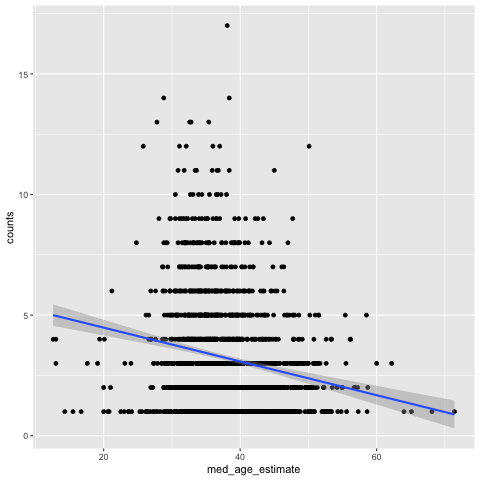

In [63]:
%%R 

ggplot(df, aes(x = med_age_estimate, y = counts)) + geom_point() + geom_smooth(method = 'lm')

`geom_smooth()` using formula = 'y ~ x'


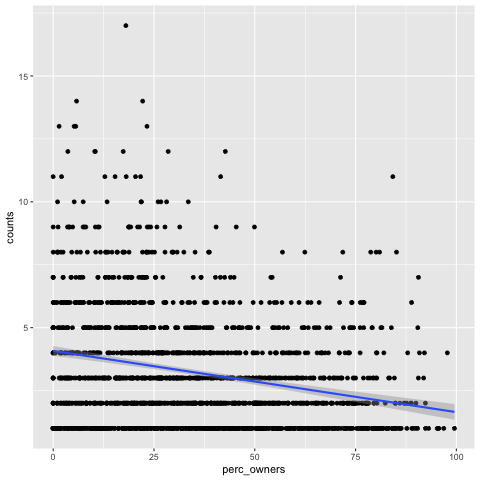

In [65]:
%%R 

ggplot(df, aes(x = perc_owners, y = counts)) + geom_point() + geom_smooth(method = 'lm')